#### EXPLORING THE DATA
Let's start by importing the libraries we're going to need and loading a dataset about football players and their statistics.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data=pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv",low_memory=False)


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Acceleration         17981 non-null  object
 5   Aggression           17981 non-null  object
 6   Agility              17981 non-null  object
 7   Balance              17981 non-null  object
 8   Ball control         17981 non-null  object
 9   Composure            17981 non-null  object
 10  Crossing             17981 non-null  object
 11  Curve                17981 non-null  object
 12  Dribbling            17981 non-null  object
 13  Finishing            17981 non-null  object
 14  Free kick accuracy   17981 non-null  object
 15  GK diving            17981 non-null  object
 16  GK h

Lets change the following columns to numerical values to make it possible to perform numerical operations on them.

In [61]:
data.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys',
       'Preferred Positions'],
      dtype='object')

In [62]:
cols=['Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']
data[cols]=data[cols].apply(pd.to_numeric,errors="coerce",axis=1)


In [63]:
# First 10 rows of the DataFrame
data.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK


In [64]:
data.describe()

,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17926.000000,17928.00000,17937.000000,17941.000000,17888.000000,17923.000000,17915.000000,17920.000000,...,17914.000000,17876.000000,17929.000000,17918.000000,17906.000000,17915.000000,17901.000000,17913.000000,17904.000000,17950.000000
mean,25.144541,66.247984,103.446893,77.59923,98.150248,86.616911,121.420338,103.764995,86.550600,62.586496,...,121.637937,115.298557,83.046796,89.598672,119.034849,123.126151,109.390425,116.040138,91.195878,54.622507
std,4.614272,6.987965,986.386054,768.79730,910.809847,752.123941,1236.108966,1028.086556,912.376407,623.794730,...,1161.367097,1157.803920,811.145271,1074.217147,1185.940156,1261.551333,1286.912547,1148.520031,945.840135,523.716920
min,16.000000,46.000000,11.000000,11.00000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,21.000000,62.000000,56.000000,43.00000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,...,55.250000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,25.000000,66.000000,67.000000,59.00000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,...,62.000000,62.000000,59.000000,51.000000,67.000000,66.000000,54.000000,66.000000,54.000000,44.000000
75%,28.000000,71.000000,75.000000,69.00000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,47.000000,94.000000,33270.000000,43130.00000,30164.000000,31472.000000,43145.000000,27150.000000,27150.000000,43131.000000,...,27760.000000,28856.000000,29677.000000,43372.000000,32905.000000,43433.000000,43144.000000,31868.000000,28216.000000,43129.000000


By using data.describe() function , it would appers that we have 17981 entries in total,with some NaN values and some values that fall outside the expected stats range.

We would have difficulty trying to compare an acceleration score of 67 with an anomaly score of 33270, where we expected all scores to fall below 100.

Therefore , let me convert all statistics > 100 to NaN and see the summary stats.

In [65]:
for column in data.describe().columns:
    data[column]=data[column].apply(lambda x: x if x<=100 else np.nan)
data.describe()

,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17897.000000,17913.000000,17910.000000,17924.000000,17840.000000,17887.000000,17885.000000,17908.000000,...,17866.000000,17832.000000,17908.000000,17886.000000,17867.000000,17873.000000,17857.000000,17877.000000,17874.000000,17940.000000
mean,25.144541,66.247984,64.576521,55.791492,63.333613,63.803894,58.071469,57.877341,49.725301,47.261112,...,61.898802,58.263964,55.622292,45.496645,64.795713,63.233201,47.352187,65.279130,52.967495,43.198495
std,4.614272,6.987965,14.918313,17.476572,14.802800,14.100950,16.834554,12.938165,18.474237,18.463394,...,9.176709,14.947943,17.408483,21.489926,14.649127,15.942738,21.851023,12.618415,14.387015,17.734259
min,16.000000,46.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,21.000000,62.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,37.000000,34.000000,...,55.000000,53.000000,46.000000,23.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,25.000000,66.000000,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,...,62.000000,62.000000,59.000000,51.000000,67.000000,66.000000,54.000000,66.000000,54.000000,44.000000
75%,28.000000,71.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,47.000000,94.000000,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,92.000000,...,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


Now we have a much better dataset with all the anomalies removed, so we can easily compare the values that are available for us.

#### SLICING
 Using .iloc[], we will be able to slice the DataFrame similarly to the way we would slice a list. It uses number slicing to get positional records. The syntax for slicing is as follows:

      <>dataframe.iloc[start-row:stop_row,start_column:stop_column]<>

When slicing in Pandas the start bound is included in the output, i.e. if we slice rows [0:5], we will extract rows 0 to 4.


In [66]:
data.iloc[:101,:] #selects rows 0 to 100. giving a total of 101 rows

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,D. Alli,21,England,84.0,77.0,84.0,74.0,62.0,85.0,86.0,...,83.0,77.0,57.0,76.0,89.0,63.0,71.0,83.0,76.0,LM CF CAM
97,S. Mané,25,Senegal,84.0,94.0,73.0,89.0,85.0,84.0,78.0,...,77.0,77.0,38.0,92.0,82.0,35.0,72.0,78.0,68.0,LW RW
98,Carvajal,25,Spain,84.0,76.0,81.0,82.0,79.0,83.0,74.0,...,81.0,64.0,86.0,86.0,84.0,85.0,75.0,57.0,34.0,RB
99,J. Draxler,23,Germany,84.0,76.0,48.0,81.0,75.0,87.0,81.0,...,84.0,86.0,26.0,79.0,68.0,35.0,67.0,84.0,84.0,LM CAM LW


Another slicing method is to use the .loc[] function native to Pandas. .loc[] allows us to slice based on data labels, as opposed to .iloc[] which slices based on the DataFrame index. An easy way to remember the difference is the i in .iloc[] is for index.

In [67]:
data.loc[0:5]

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK
5,R. Lewandowski,28,Poland,91.0,79.0,80.0,78.0,80.0,89.0,87.0,...,83.0,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0,ST


#### Renaming Columns
In Python, it is good practice to label columns in a way that conforms to PEP 8 naming standards (for example, no spaces in the name).

In [68]:
# How to change the name of a column in pandas a dataframe
data=data.rename(columns={"Preferred Positions": "Preferred_Positions"})
data.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred_Positions
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK


#### Working with Datatypes
To find non-numerical categorical data in our DataFrame, we first use .select_dtypes(include/exclude) to find the data type.

In [69]:
data.select_dtypes(include="object").head()

,Name,Nationality,Preferred_Positions
0,Cristiano Ronaldo,Portugal,ST LW
1,L. Messi,Argentina,RW
2,Neymar,Brazil,LW
3,L. Suárez,Uruguay,ST
4,M. Neuer,Germany,GK


In some cases, it might benefit our analysis to change the data types in our DataFrame (such as converting an integer to a float). The code below enables us to do this.

Let's take Age, generally expressed as an int, and convert it to a float using the .astype() function.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Age                  17981 non-null  int64  
 2   Nationality          17981 non-null  object 
 3   Overall              17981 non-null  float64
 4   Acceleration         17897 non-null  float64
 5   Aggression           17913 non-null  float64
 6   Agility              17910 non-null  float64
 7   Balance              17924 non-null  float64
 8   Ball control         17840 non-null  float64
 9   Composure            17887 non-null  float64
 10  Crossing             17885 non-null  float64
 11  Curve                17908 non-null  float64
 12  Dribbling            17850 non-null  float64
 13  Finishing            17867 non-null  float64
 14  Free kick accuracy   17932 non-null  float64
 15  GK diving            17955 non-null 

In [71]:
data["Age"]=data["Age"].astype("float")

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Age                  17981 non-null  float64
 2   Nationality          17981 non-null  object 
 3   Overall              17981 non-null  float64
 4   Acceleration         17897 non-null  float64
 5   Aggression           17913 non-null  float64
 6   Agility              17910 non-null  float64
 7   Balance              17924 non-null  float64
 8   Ball control         17840 non-null  float64
 9   Composure            17887 non-null  float64
 10  Crossing             17885 non-null  float64
 11  Curve                17908 non-null  float64
 12  Dribbling            17850 non-null  float64
 13  Finishing            17867 non-null  float64
 14  Free kick accuracy   17932 non-null  float64
 15  GK diving            17955 non-null 

In [73]:
data["Age"].dtype

dtype('float64')

#### Visualising The Data
Pandas DataFrames are a great way to wrangle data, but to see trends and patterns, find key insights, and identify outliers in the data, it generally helps to visualise them in a meaningful way. Python has some of the best graphing packages available to facilitate this. Matplotlib and Seaborn are two of the most commonly used packages for a variety of visualisations.

In [74]:
# set the colour pelette preference for seaborn
sns.set_palette("Spectral_r",n_colors=4)

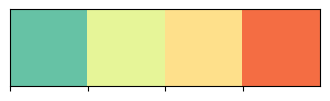

In [75]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.show()

#### Histogram
A histogram is very similar to a bar chart, except that it groups data or puts it into ranges. These groupings/ranges are called "bins".

Seaborn and Matplotlib have their own histogram functions.

Seaborn will combine the histogram with a distribution if prompted to do so. If we want to display the distribution, we simply add the argument kde=True to the plot.

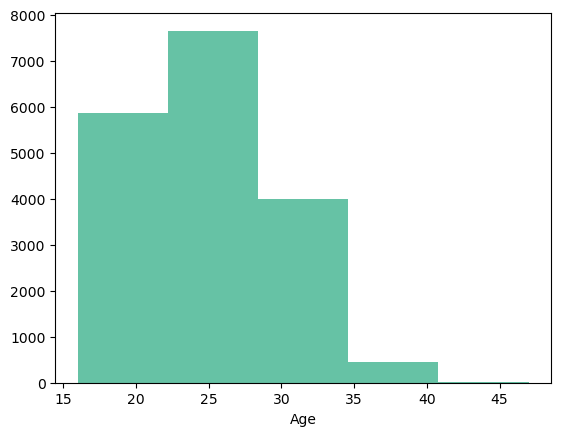

In [76]:
#matplotlib histogram
plt.hist(data["Age"],bins=5)
plt.xlabel("Age")
plt.show()

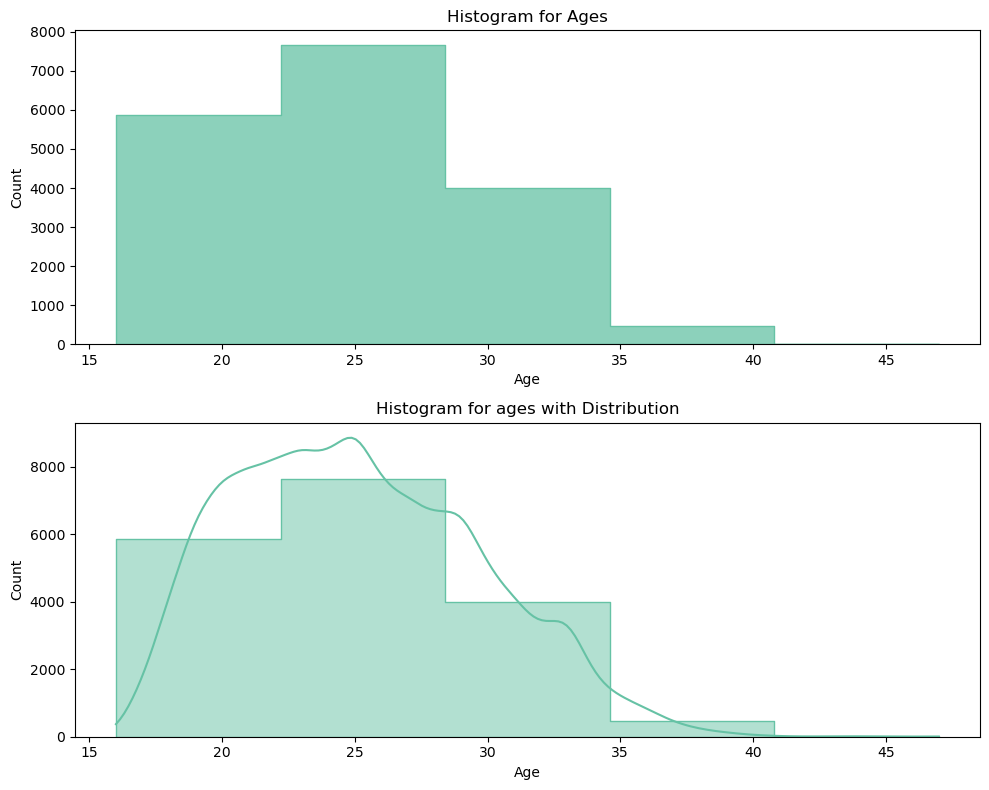

In [77]:
# Seaborn histogram
fig, ax=plt.subplots(2,1, figsize=(10,8))

sns.histplot(data["Age"],bins=5,element="step",ax=ax[0])
sns.histplot(data["Age"],bins=5,element="step",kde=True,ax=ax[1])


ax[0].set_title("Histogram for Ages")
ax[1].set_title("Histogram for ages with Distribution")

plt.tight_layout()
plt.show()

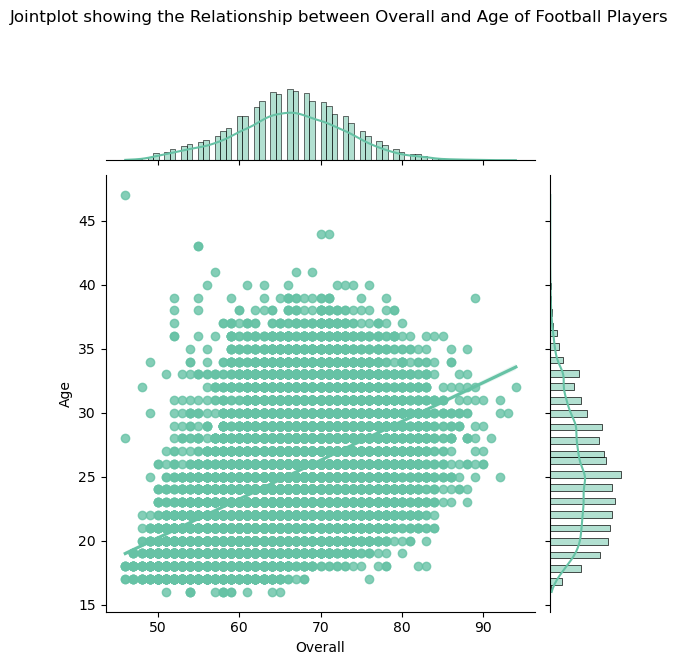

In [78]:
j = sns.jointplot(data=data, x='Overall', y='Age', kind='reg')
plt.suptitle('Jointplot showing the Relationship between Overall and Age of Football Players', y=1.1)
plt.show()

From the graph above it is very difficult to see how "overall" and "Age" variables are related. To improve this, we can try changing the kind/type of plot to an hexagon. which displays the number of matching points much more clearly.

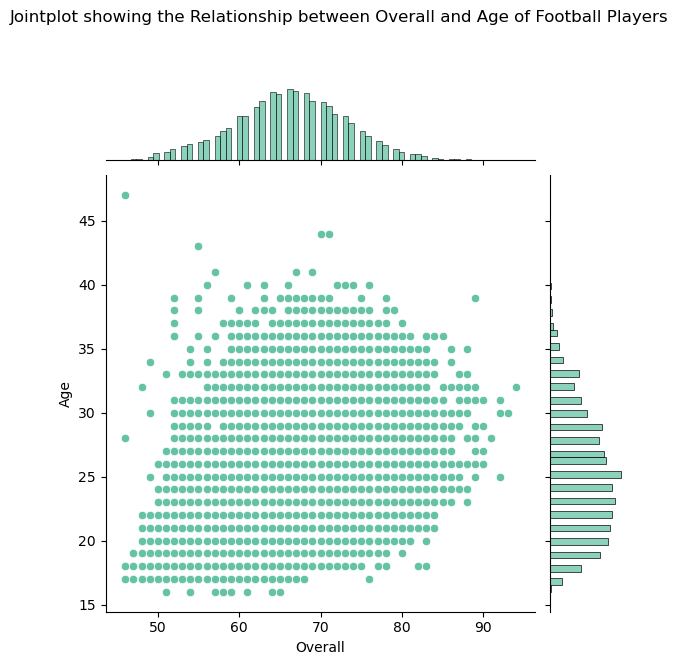

In [79]:
j=sns.jointplot(data=data,x="Overall",y="Age")
plt.suptitle('Jointplot showing the Relationship between Overall and Age of Football Players', y=1.1)
plt.show()

#### BOX PLOTS
Used to show the spread of data. The main difference between a boxplot and histogram (which also shows distibution as mentioned above) is that it takes up less space to plot.

Box plots are constructed using the 5-number summary as indicated below:

```{Lower Extreme ; Q1 ; Median ; Q3 ; Upper Extreme}```

![](https://upload.wikimedia.org/wikipedia/commons/5/5c/Labeled_Box_and_Whisker_Plot.png)

In [80]:
young_players=data[(data["Age"]>22) & (data["Age"]<27)] #filtering ages
young_players.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred_Positions
2,Neymar,25.0,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
6,De Gea,26.0,Spain,90.0,57.0,38.0,60.0,43.0,42.0,64.0,...,50.0,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0,GK
7,E. Hazard,26.0,Belgium,90.0,93.0,54.0,93.0,91.0,92.0,87.0,...,86.0,79.0,22.0,87.0,79.0,27.0,65.0,86.0,79.0,LW
11,K. De Bruyne,26.0,Belgium,89.0,76.0,68.0,80.0,75.0,87.0,84.0,...,90.0,85.0,40.0,75.0,87.0,51.0,73.0,90.0,82.0,RM CM CAM
12,T. Courtois,25.0,Belgium,89.0,46.0,23.0,61.0,45.0,23.0,52.0,...,32.0,36.0,16.0,52.0,38.0,18.0,70.0,44.0,12.0,GK


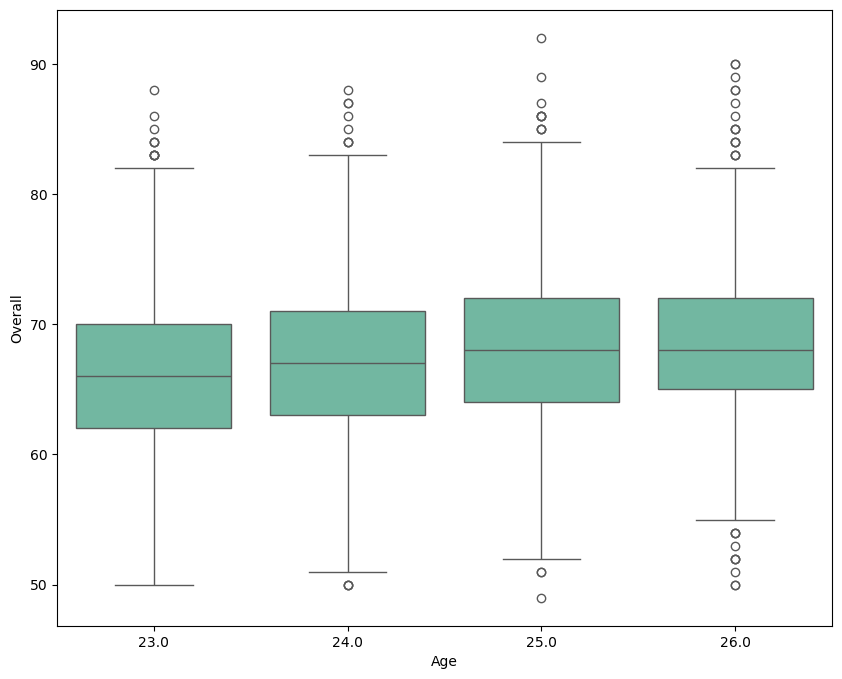

In [81]:
plt.figure(figsize=(10,8))

sns.boxplot(data=young_players, x="Age", y="Overall")
plt.show()

From the plot above, we can see the general trends of Overall stats for each specific age. Box plots, compared to histograms, can make it much easier to compare groupings of data.

C:\Users\HP\AppData\Local\Temp\ipykernel_8552\181100030.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x="ageee",y="Salary",width=0.5, palette="Set2")


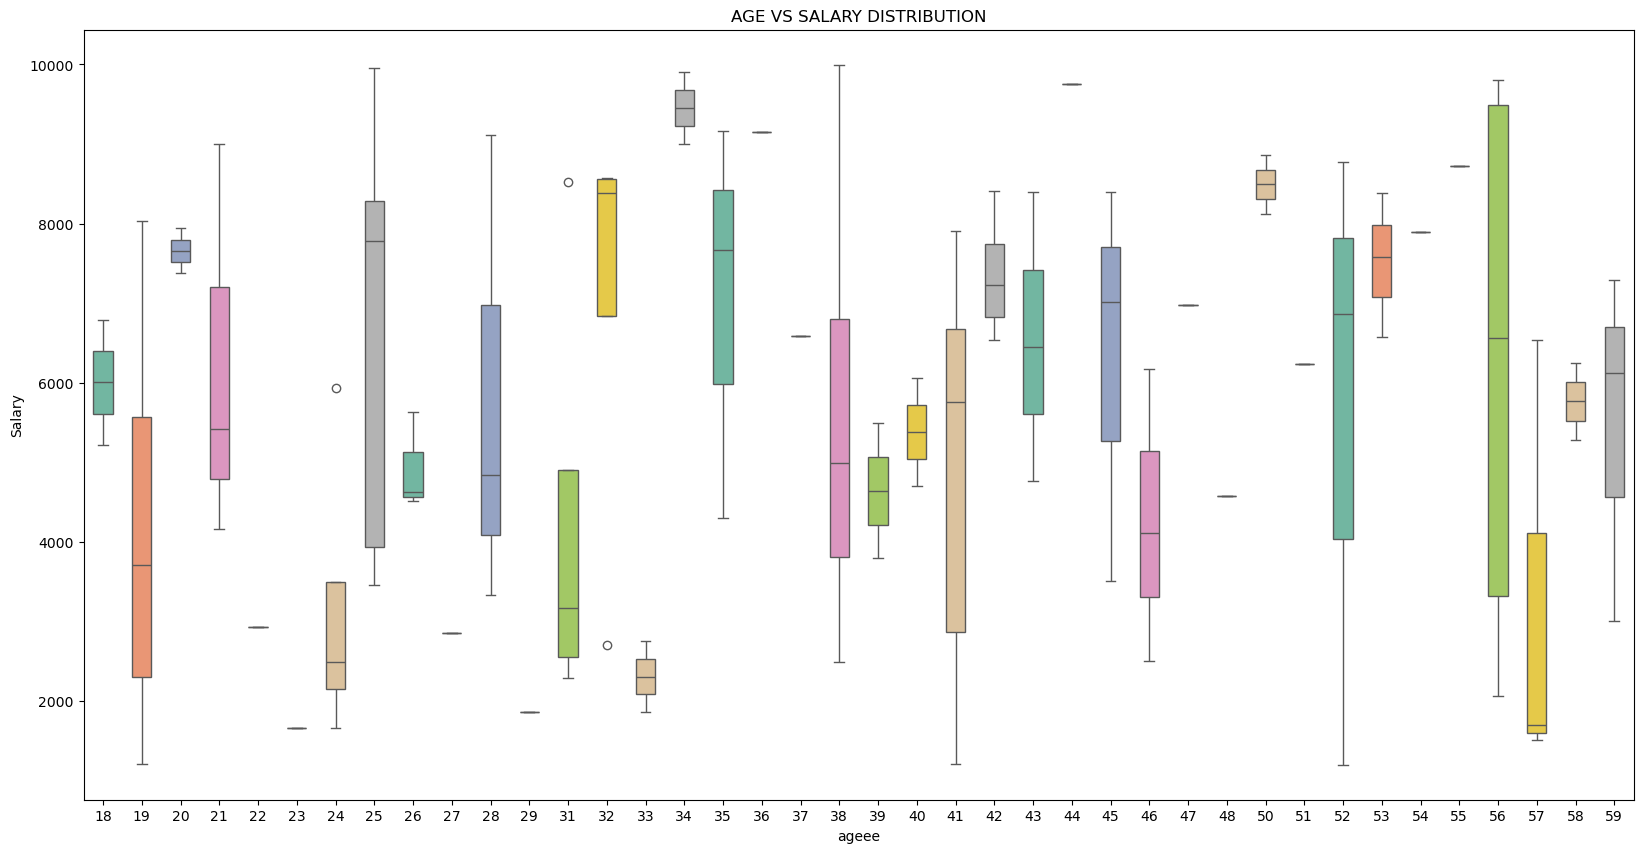

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

data=pd.DataFrame({"ageee":np.random.randint(18,60,100),
                   "Salary":np.random.randint(1000,10000,100)})
plt.figure(figsize=(20,10))
sns.boxplot(data=data,x="ageee",y="Salary",width=0.5, palette="Set2")
plt.title("AGE VS SALARY DISTRIBUTION")
plt.show()


#### VIOLIN PLOT
Violin plots are similar to box plots, but they use the KDE or distribution of values for groupings, in addition to a box (the box is still present within each graph).

Let's plot one using Seaborn with the Overall stats for various Age categories (from 23 to 26 years old).

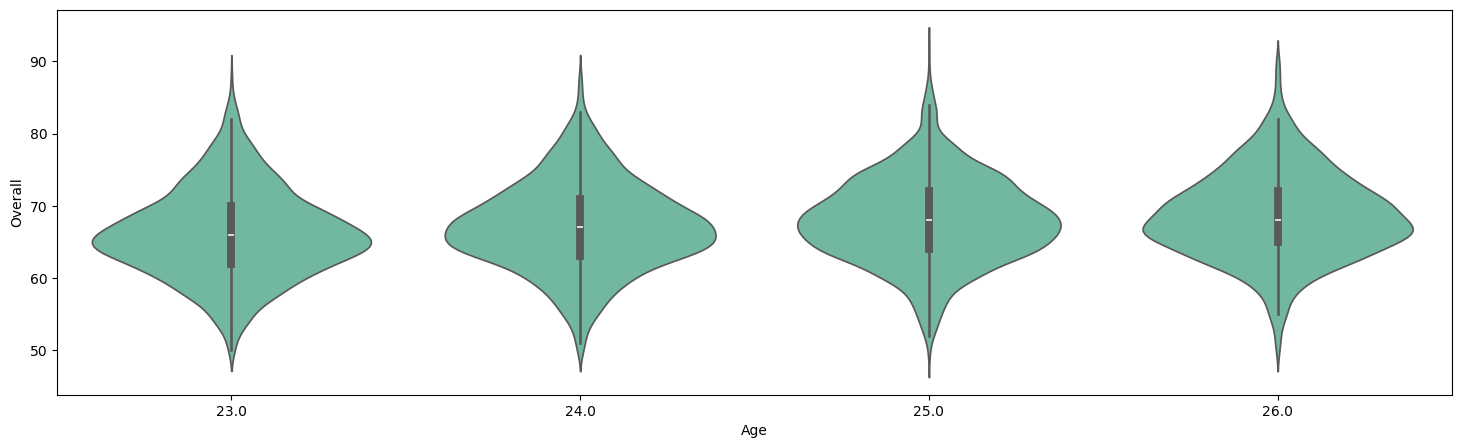

In [83]:
plt.figure(figsize=(18,5))

sns.violinplot(data=young_players, x='Age', y='Overall')
plt.show()

The violin plots show us the general distribution across each age, and it makes it much easier for us to compare them.